### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [1]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль
import seaborn as sns # наводим красоту
import numpy as np # уже знакомые нам библиотеки
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Отображение горизонтальных баров
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
  ln = np.arange(len(bars_length))
  width = 0.8
  plt.subplots(figsize = figsize)
  plt.barh(ln, bars_length, width, color='#a3cdf1')
  plt.xticks(bars_length, fontsize=20)
  plt.yticks(ln,yticks_labels, fontsize=20)
  blx = []
  for i in range(len(bars_length)):
    if bars_length[i] > 0:
      blx.append(bars_length[i])
    else:
      blx.append(0)
    plt.annotate(labels[i], xy=(blx[i] + 0.2, i), xytext=(blx[i] + 0.2, i), size=20)
  plt.grid(True)
  plt.show()



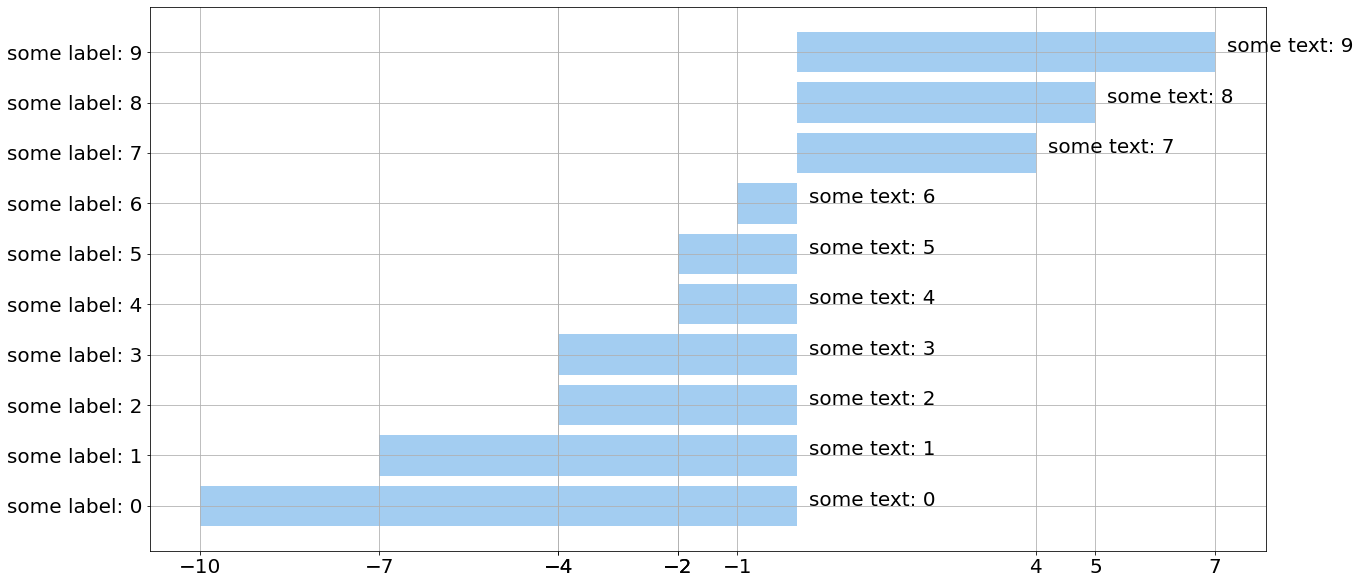

In [3]:
# Сигнатура функции и пример вывода:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
# Отображение изменений во времени вероятности событий
def plot_time_probabilities(probabilities_in_time, figsize):
  #Z = np.tile(probabilities_in_time.index, probabilities_in_time.values)
  fig = plt.figure(figsize=figsize)
  col = plt.cm.coolwarm(np.linspace(0,1,10))
  legend = ['Probability: {}'.format(i) for i in range(10)]
  plt.stackplot(probabilities_in_time.index, probabilities_in_time.values.T, colors=col)
  plt.legend(legend, loc='lower left', fontsize=14)
  plt.show()

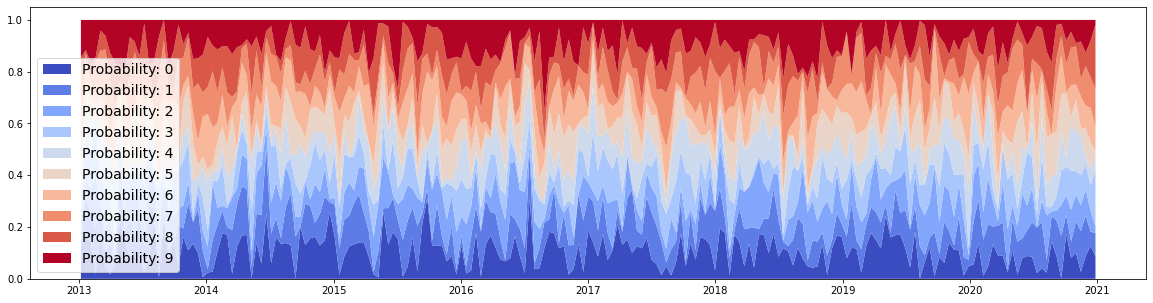

In [5]:
# Сигнатура функции и пример вывода:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [82]:
# Отображение тепловой карты по временному ряду
def plot_intraday_ts(intr_ts, figsize):
    intr_ts = intr_ts.reset_index()
    intr_ts['date'] = intr_ts['index'].dt.date.astype('str')
    intr_ts['time'] = intr_ts['index'].dt.time.astype('str')
    xticks_labels = ['{}'.format(i) for i in intr_ts['index'].dt.strftime('   %B %d   ').unique()]
    yticks_labels = ['{}'.format(i) for i in intr_ts['index'].dt.strftime('%H:%M').unique()]
    intr_ts = intr_ts.drop(columns='index')
    len_date = len(xticks_labels)
    len_time = 24
    intr_ts.rename(columns={0:'val'}, inplace=True)
    intr_ts = intr_ts.pivot('time', 'date', 'val')
    sc = plt.figure(figsize=figsize)
    a = sc.add_axes([0,0,1,1])
    plt.xticks(range(0,len_date, 2), xticks_labels[::2], fontsize=10, rotation=40)
    plt.yticks([])
    a2 = a.twinx()
    a.set_ylabel('Время', fontsize=14)
    plt.yticks(range(0,len_time), yticks_labels, fontsize=10)
    plt.pcolormesh(intr_ts, cmap='RdBu')
    cbaxes = sc.add_axes([-0.05, 0.0, 0.01, 1.0])
    plt.colorbar(orientation="vertical", cax = cbaxes)
    a.set_xlabel('Дата', fontsize=14, labelpad=20)
    plt.show()

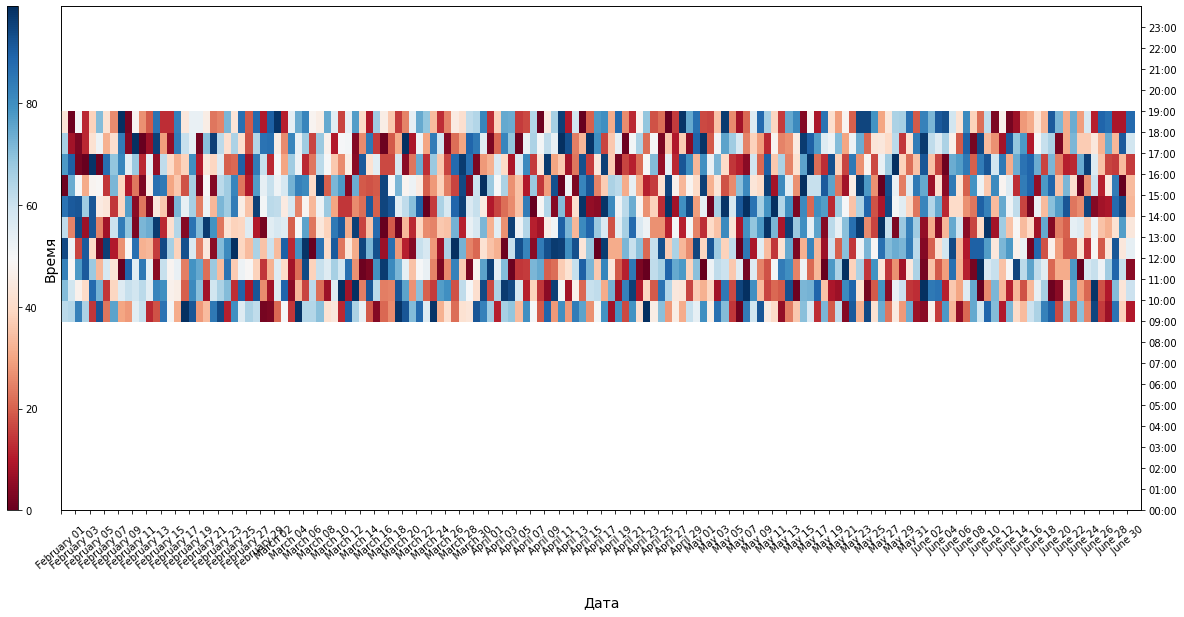

In [83]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (15, 7)

plot_intraday_ts(intraday_ts, figsize)